# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [18]:
cities[2]

'alofi'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
#all_data = {}
#for city in cities:
#    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid=059e1ee4275a7c170f6e1181fa42fd06"
#    response = requests.get(url)
#    all_data[city] = response.json()

In [ ]:
#data = response.json()
#data

In [ ]:
#url = "https://api.openweathermap.org/data/2.5/weather?q=newman&appid=059e1ee4275a7c170f6e1181fa42fd06"
#response = requests.get(url)

In [ ]:
#all_data["santa cruz"]["main"]["temp_max"]

In [ ]:
#len(cities)

In [ ]:
url = "https://api.openweathermap.org/data/2.5/weather"
api_key = weather_api_key
city_url = f"{url}?q={city}&appid={api_key}&units=imperial"
print(city_url)

In [28]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"
api_key = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Temperature": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | imbituba
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | taulaga
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | junin de los andes
Processing Record 14 of Set 1 | madinat ash shamal
Processing Record 15 of Set 1 | kalmunai
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | bolivar
Processing Record 21 of Set 1 | port pirie
Processing Record 22

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         564 non-null    object 
 1   Lat          564 non-null    float64
 2   Lng          564 non-null    float64
 3   Temperature  564 non-null    float64
 4   Humidity     564 non-null    int64  
 5   Cloudiness   564 non-null    int64  
 6   Wind Speed   564 non-null    float64
 7   Country      564 non-null    object 
 8   Date         564 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.8+ KB


In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,32.74,71,99,40.91,TF,1719668397
1,puerto ayora,-0.7393,-90.3518,70.56,98,59,8.32,EC,1719668397
2,alofi,-19.0595,-169.9187,75.09,94,75,0.00,NU,1719668397
3,college,64.8569,-147.8028,59.90,77,100,3.44,US,1719668397
4,iskateley,67.6803,53.1512,51.46,93,100,8.57,RU,1719668397


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [32]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.74,71,99,40.91,TF,1719668397
1,puerto ayora,-0.7393,-90.3518,70.56,98,59,8.32,EC,1719668397
2,alofi,-19.0595,-169.9187,75.09,94,75,0.00,NU,1719668397
3,college,64.8569,-147.8028,59.90,77,100,3.44,US,1719668397
4,iskateley,67.6803,53.1512,51.46,93,100,8.57,RU,1719668397


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

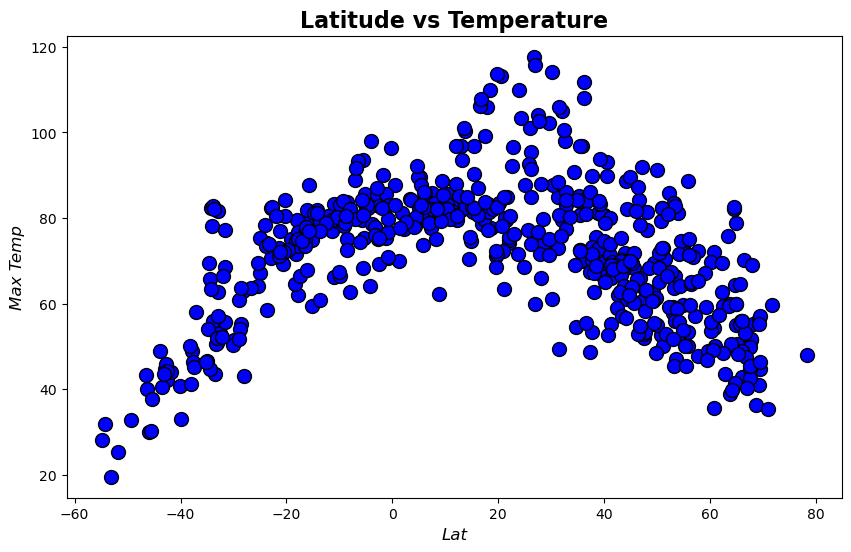

In [38]:
# Build scatter plot for latitude vs. temperature
x = city_data_df.Lat
y = city_data_df.Temperature

# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x, y, facecolor="blue", edgecolor="black", s=100)

# Incorporate the other graph properties
plt.xlabel("Lat", fontsize=12, fontstyle="italic")
plt.ylabel("Max Temp", fontsize=12, fontstyle="italic")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

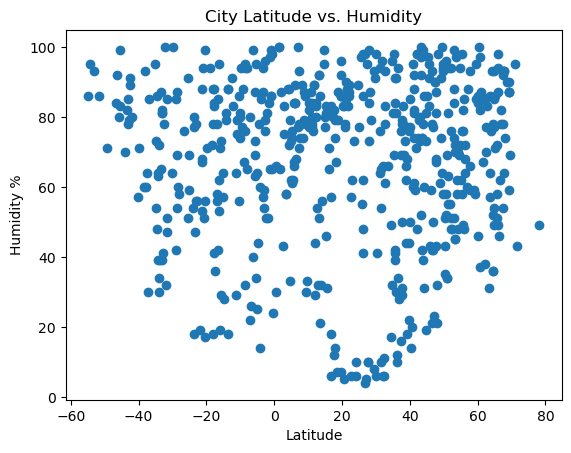

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

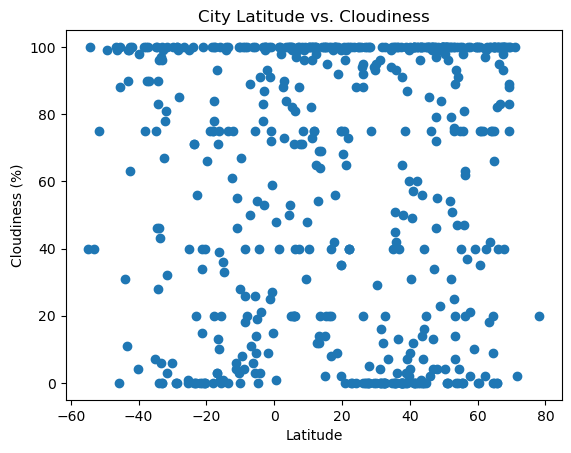

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

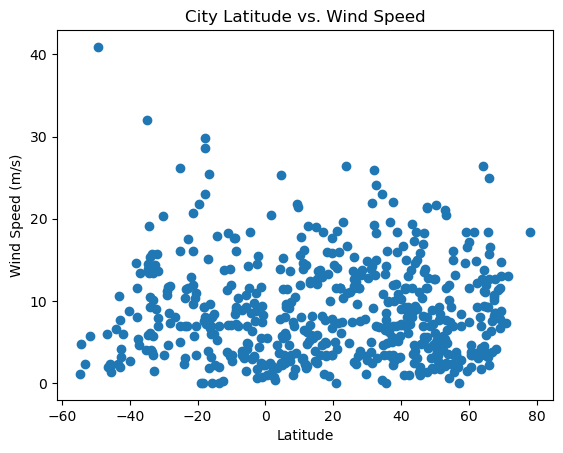

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    print(f"r-value: {rvalue}")

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,college,64.8569,-147.8028,59.90,77,100,3.44,US,1719668397
4,iskateley,67.6803,53.1512,51.46,93,100,8.57,RU,1719668397
7,ribeira grande,38.5167,-28.7000,75.60,73,75,11.99,PT,1719668398
9,ilulissat,69.2167,-51.1000,41.02,87,75,11.50,GL,1719668398
10,aasiaat,68.7098,-52.8699,36.27,90,100,11.34,GL,1719668398


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,32.74,71,99,40.91,TF,1719668397
1,puerto ayora,-0.7393,-90.3518,70.56,98,59,8.32,EC,1719668397
2,alofi,-19.0595,-169.9187,75.09,94,75,0.00,NU,1719668397
5,imbituba,-28.2400,-48.6703,62.85,60,99,11.77,BR,1719668397
6,coquimbo,-29.9533,-71.3436,51.53,100,100,3.44,CL,1719668398


###  Temperature vs. Latitude Linear Regression Plot

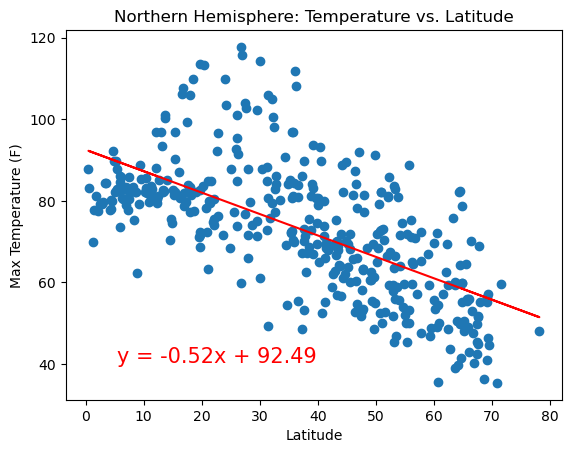

r-value: -0.6452590417852775


In [49]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Temperature"], 
                       "Northern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (F)")

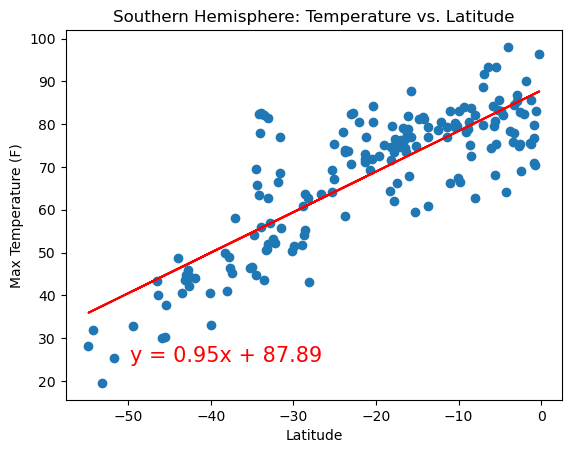

r-value: 0.8230395106604739


In [50]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE 
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Temperature"], 
                       "Southern Hemisphere: Temperature vs. Latitude", "Latitude", "Max Temperature (F)")

**Discussion about the linear relationship:** In the northern hemisphere, max temperatures are higher closer to the equator (Lat 0) and gradually decrease as latitude increases (moves further north away from the equator). In the souther hemisphere, the same relationship exists the further away the city is from the equator.

### Humidity vs. Latitude Linear Regression Plot

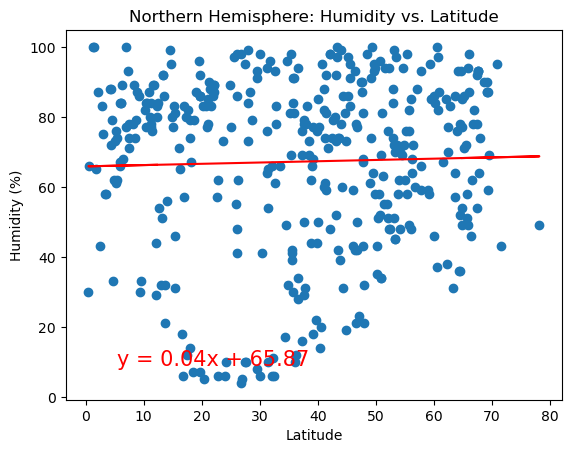

r-value: 0.029038945586471278


In [51]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

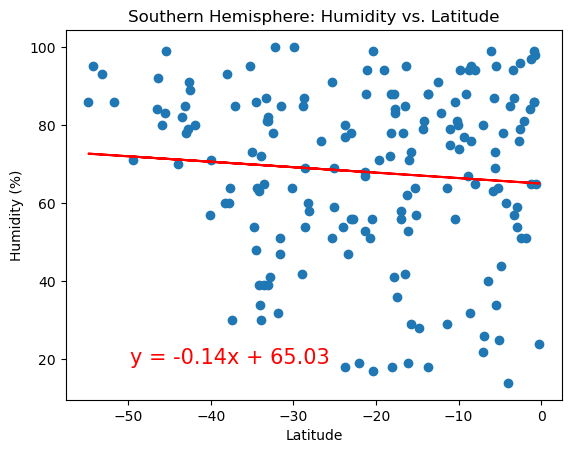

r-value: -0.08871791894128618


In [52]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** Humidity does not appear to be impacted by latitude in a predictable way except that there is higher humidity in general in the northern hemisphere than in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

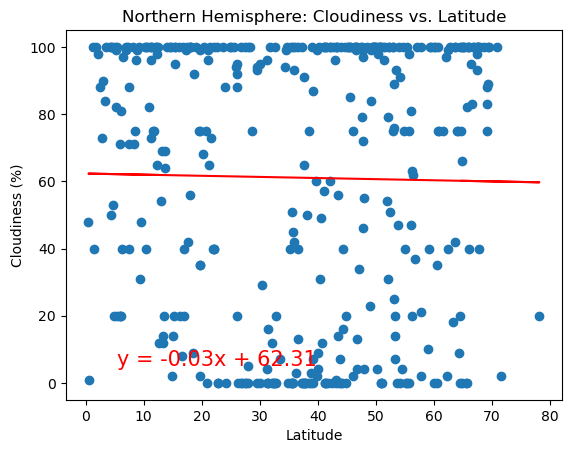

r-value: -0.016097236653843074


In [53]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

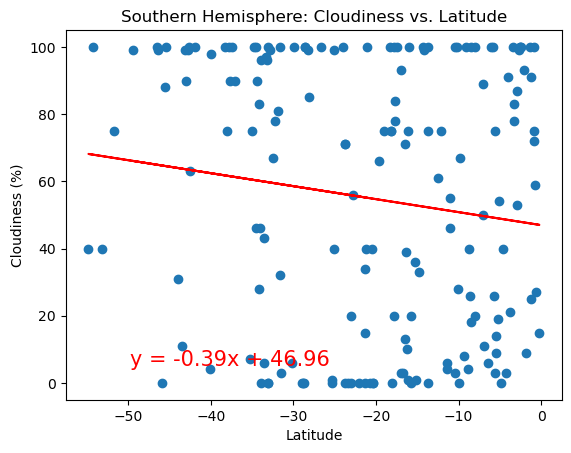

r-value: -0.13721021153771118


In [54]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** Cloudiness does not appear to be related to latitude.

### Wind Speed vs. Latitude Linear Regression Plot

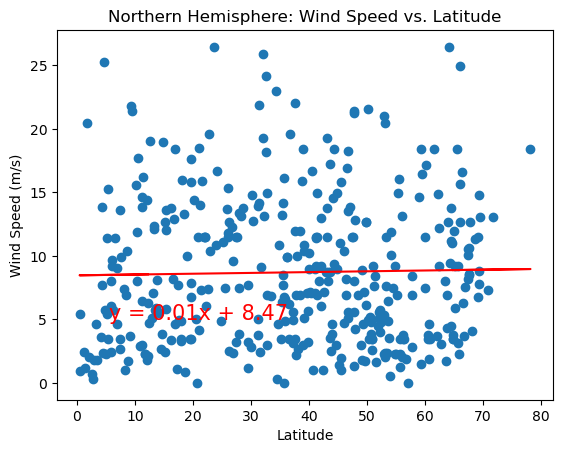

r-value: 0.021677363961525142


In [55]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

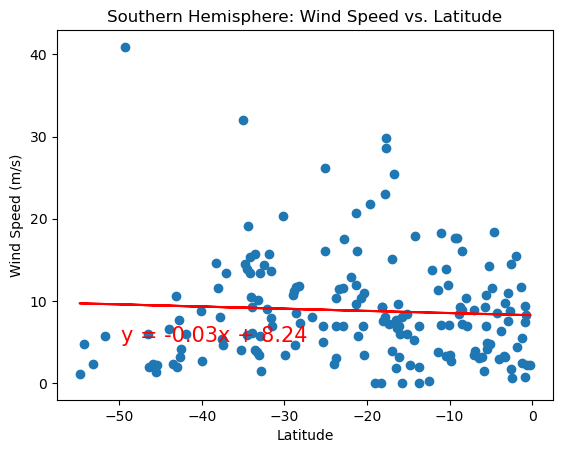

r-value: -0.056401388030013565


In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** Wind speed does not appear to be related to latitude.